<a href="https://colab.research.google.com/github/mummadimaheswar/VOIS_AICTE_OCT2025_Mummadi_Maheswar_Reddy/blob/main/MummadiMaheswarReddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv')

/tmp/ipython-input-1710893607.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv')


In [ ]:
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34125 entries, 0 to 34124
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34125 non-null  int64  
 1   NAME                            34008 non-null  object 
 2   host id                         34124 non-null  float64
 3   host_identity_verified          33966 non-null  object 
 4   host name                       33899 non-null  object 
 5   neighbourhood group             34097 non-null  object 
 6   neighbourhood                   34108 non-null  object 
 7   lat                             34116 non-null  float64
 8   long                            34116 non-null  float64
 9   country                         34037 non-null  object 
 10  country code                    34045 non-null  object 
 11  instant_bookable                34045 non-null  object 
 12  cancellation_policy             

In [ ]:
df.duplicated().value_counts()

,count
False,10585


In [ ]:
df[df['neighbourhood group'] =='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",2.680241e+10,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [ ]:
# Step 2: Data Cleaning
print("Original dataset shape:", df.shape)

# Drop duplicates
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

# Clean price column - remove $ and commas, convert to numeric
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '')
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Clean service fee column if it exists
if 'service fee' in df.columns:
    df['service fee'] = df['service fee'].astype(str).str.replace('$', '').str.replace(',', '')
    df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')

# Convert Construction year to numeric
if 'Construction year' in df.columns:
    df['Construction year'] = pd.to_numeric(df['Construction year'], errors='coerce')

# Handle missing values for essential columns
essential_columns = ['price', 'room type', 'neighbourhood group', 'neighbourhood']
existing_essential = [col for col in essential_columns if col in df.columns]
df = df.dropna(subset=existing_essential)

print("After cleaning and removing rows with missing essential data:", df.shape)

# Remove extreme outliers in price (beyond 99th percentile)
if 'price' in df.columns:
    price_99th = df['price'].quantile(0.99)
    df = df[df['price'] <= price_99th]
    print("After removing price outliers (>99th percentile):", df.shape)

# Display cleaned data info
print("\nCleaned Dataset Info:")
print(df.describe())

Original dataset shape: (34125, 26)
After removing duplicates: (34125, 26)
After cleaning and removing rows with missing essential data: (33985, 26)
After removing price outliers (>99th percentile): (33663, 26)

Cleaned Dataset Info:
                 id       host id           lat          long  \
count  3.366300e+04  3.366300e+04  33655.000000  33655.000000   
mean   1.043736e+07  4.931295e+10     40.728879    -73.953853   
std    5.435139e+06  2.849764e+10      0.054282      0.043090   
min    1.001254e+06  1.303496e+08     40.499790    -74.242850   
25%    5.734823e+06  2.470806e+10     40.689190    -73.982490   
50%    1.044070e+07  4.913439e+10     40.722320    -73.956290   
75%    1.514933e+07  7.401891e+10     40.763740    -73.938945   
max    1.984747e+07  9.876097e+10     40.911690    -73.712990   

       Construction year         price   service fee  minimum nights  \
count       33522.000000  33663.000000  33586.000000    33478.000000   
mean         2012.484189    617.1391

Room Types in the dataset:
room type
Entire home/apt    17744
Private room       15292
Shared room          627
Name: count, dtype: int64


/tmp/ipython-input-2495960094.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=room_type_col, palette='viridis', order=room_type_counts.index)


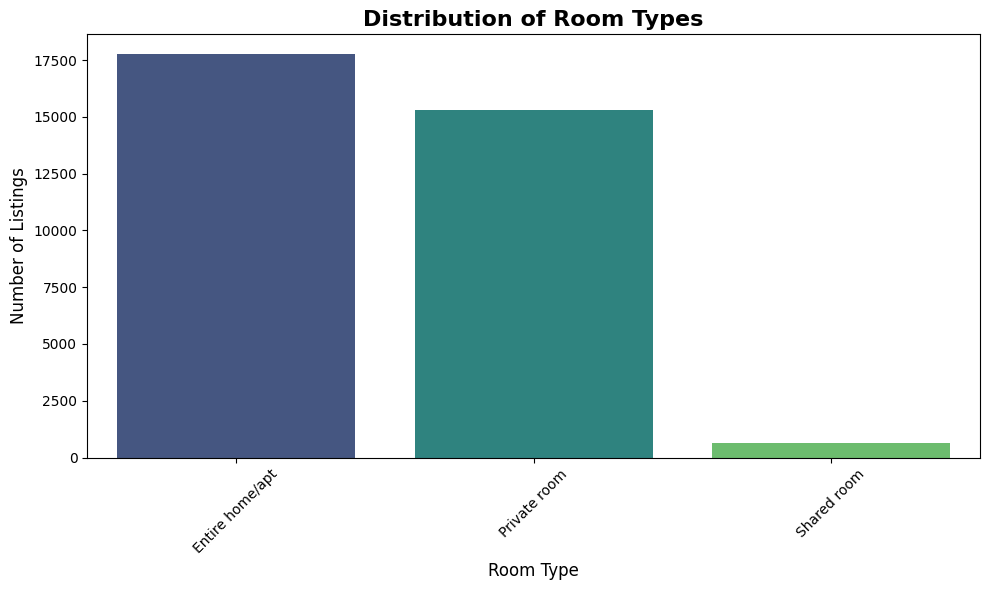


Room Type Percentages:
room type
Entire home/apt    52.71
Private room       45.43
Shared room         1.86
Name: proportion, dtype: float64
Property type column not found in the dataset


In [ ]:
# Step 3: Property Types & Room Types Analysis

# Check what room type column exists
room_type_col = None
for col in ['room type', 'room_type', 'Room type', 'Room Type']:
    if col in df.columns:
        room_type_col = col
        break

if room_type_col:
    print("Room Types in the dataset:")
    room_type_counts = df[room_type_col].value_counts()
    print(room_type_counts)

    # Bar chart for room type counts
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=room_type_col, palette='viridis', order=room_type_counts.index)
    plt.title("Distribution of Room Types", fontsize=16, fontweight='bold')
    plt.xlabel("Room Type", fontsize=12)
    plt.ylabel("Number of Listings", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Percentage breakdown
    print("\nRoom Type Percentages:")
    room_type_pct = (df[room_type_col].value_counts(normalize=True) * 100).round(2)
    print(room_type_pct)
else:
    print("Room type column not found in the dataset")

# Check for property type if it exists
property_type_cols = ['property type', 'property_type', 'Property Type', 'Property type']
property_type_col = None
for col in property_type_cols:
    if col in df.columns:
        property_type_col = col
        break

if property_type_col:
    print("\nProperty Types in the dataset:")
    property_type_counts = df[property_type_col].value_counts().head(10)
    print(property_type_counts)

    # Bar chart for property type counts (top 10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=property_type_counts.values, y=property_type_counts.index, palette='magma')
    plt.title("Top 10 Property Types", fontsize=16, fontweight='bold')
    plt.xlabel("Number of Listings", fontsize=12)
    plt.ylabel("Property Type", fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("Property type column not found in the dataset")

Top 15 Neighbourhoods by Number of Listings:
neighbourhood
Williamsburg          2905
Bedford-Stuyvesant    2536
Harlem                1955
Bushwick              1636
Upper West Side       1484
East Village          1392
Upper East Side       1309
Crown Heights         1184
Hell's Kitchen        1184
Midtown                911
Greenpoint             857
East Harlem            772
Chelsea                741
Lower East Side        675
Washington Heights     651
Name: count, dtype: int64


/tmp/ipython-input-3768447226.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighbourhood_counts.values, y=neighbourhood_counts.index, palette='plasma')


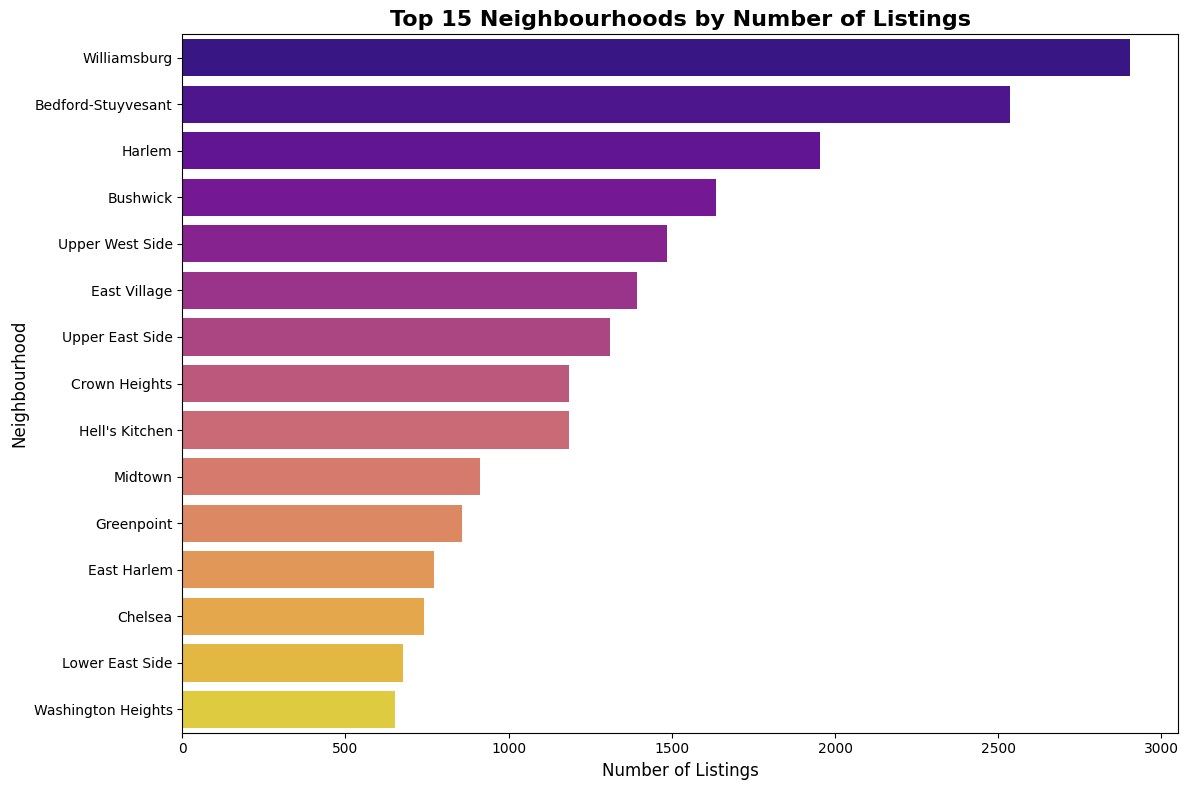


Neighbourhood with highest listings: Williamsburg (2905 listings)

Average Price by Neighbourhood Group:
                       mean  count     std
neighbourhood group                       
Queens               627.09   3421  331.57
Staten Island        623.93    234  325.18
Manhattan            616.55  14907  328.72
Brooklyn             615.62  14471  330.05
Bronx                609.73    628  321.73
brookln              580.00      1     NaN
manhatan             460.00      1     NaN


/tmp/ipython-input-3768447226.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=avg_price_by_group.index, y=avg_price_by_group['mean'],
/tmp/ipython-input-3768447226.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_group.index, y=avg_price_by_group['mean'],


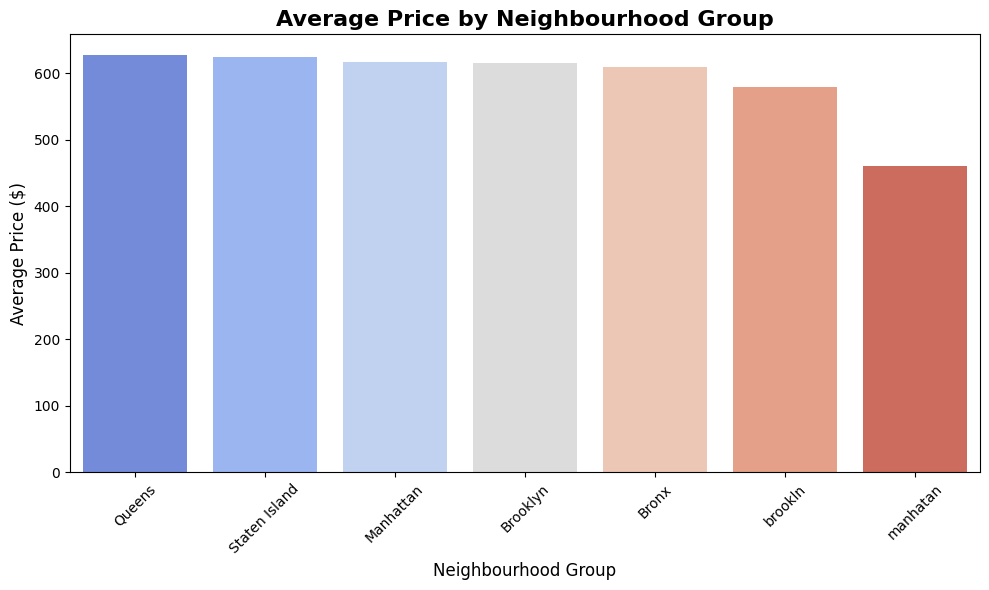


Neighbourhood group with highest average price: Queens ($627.09)


/tmp/ipython-input-3768447226.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='neighbourhood group', y='price', palette='Set2')


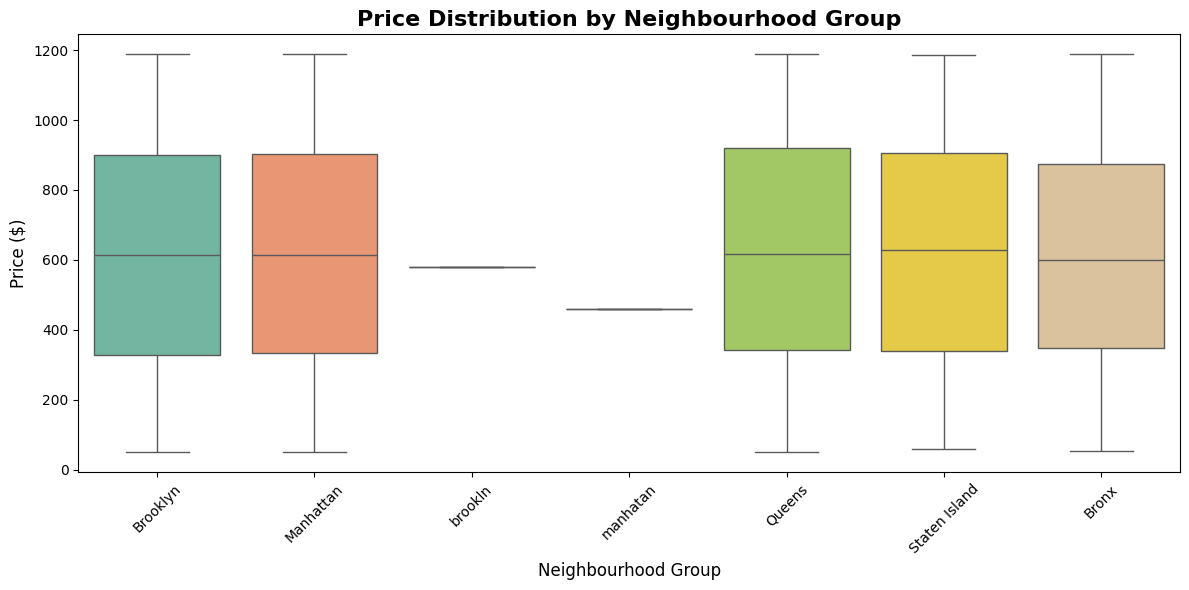

In [ ]:
# Step 4: Neighbourhood Analysis

# Find neighbourhood with highest number of listings
if 'neighbourhood' in df.columns:
    neighbourhood_counts = df['neighbourhood'].value_counts().head(15)

    print("Top 15 Neighbourhoods by Number of Listings:")
    print(neighbourhood_counts)

    # Bar chart for neighbourhoods with most listings
    plt.figure(figsize=(12, 8))
    sns.barplot(x=neighbourhood_counts.values, y=neighbourhood_counts.index, palette='plasma')
    plt.title("Top 15 Neighbourhoods by Number of Listings", fontsize=16, fontweight='bold')
    plt.xlabel("Number of Listings", fontsize=12)
    plt.ylabel("Neighbourhood", fontsize=12)
    plt.tight_layout()
    plt.show()

    print(f"\nNeighbourhood with highest listings: {neighbourhood_counts.index[0]} ({neighbourhood_counts.iloc[0]} listings)")

# Find neighbourhood group with highest average price
if 'neighbourhood group' in df.columns and 'price' in df.columns:
    avg_price_by_group = df.groupby('neighbourhood group')['price'].agg(['mean', 'count', 'std']).round(2)
    avg_price_by_group = avg_price_by_group.sort_values('mean', ascending=False)

    print("\nAverage Price by Neighbourhood Group:")
    print(avg_price_by_group)

    # Bar chart for average price by neighbourhood group
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_price_by_group.index, y=avg_price_by_group['mean'],
                palette='coolwarm', ci=None)
    plt.title("Average Price by Neighbourhood Group", fontsize=16, fontweight='bold')
    plt.xlabel("Neighbourhood Group", fontsize=12)
    plt.ylabel("Average Price ($)", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"\nNeighbourhood group with highest average price: {avg_price_by_group.index[0]} (${avg_price_by_group.iloc[0]['mean']:.2f})")

    # Box plot for price distribution by neighbourhood group
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='neighbourhood group', y='price', palette='Set2')
    plt.title("Price Distribution by Neighbourhood Group", fontsize=16, fontweight='bold')
    plt.xlabel("Neighbourhood Group", fontsize=12)
    plt.ylabel("Price ($)", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Construction Year Range: 2003.0 to 2022.0
Number of properties with valid construction years: 33522


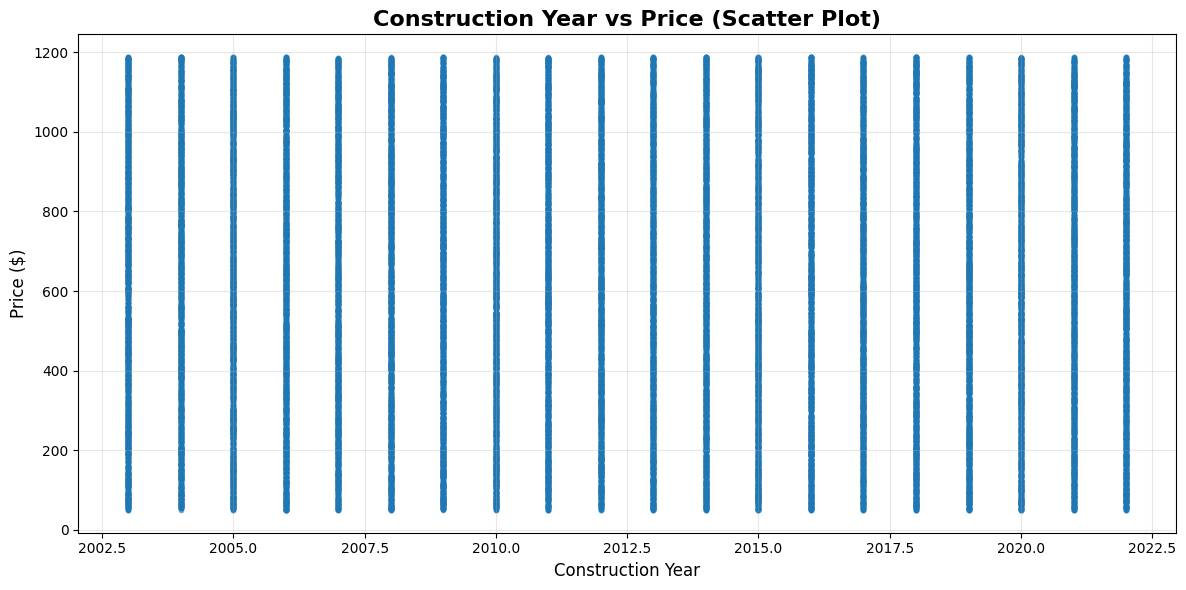

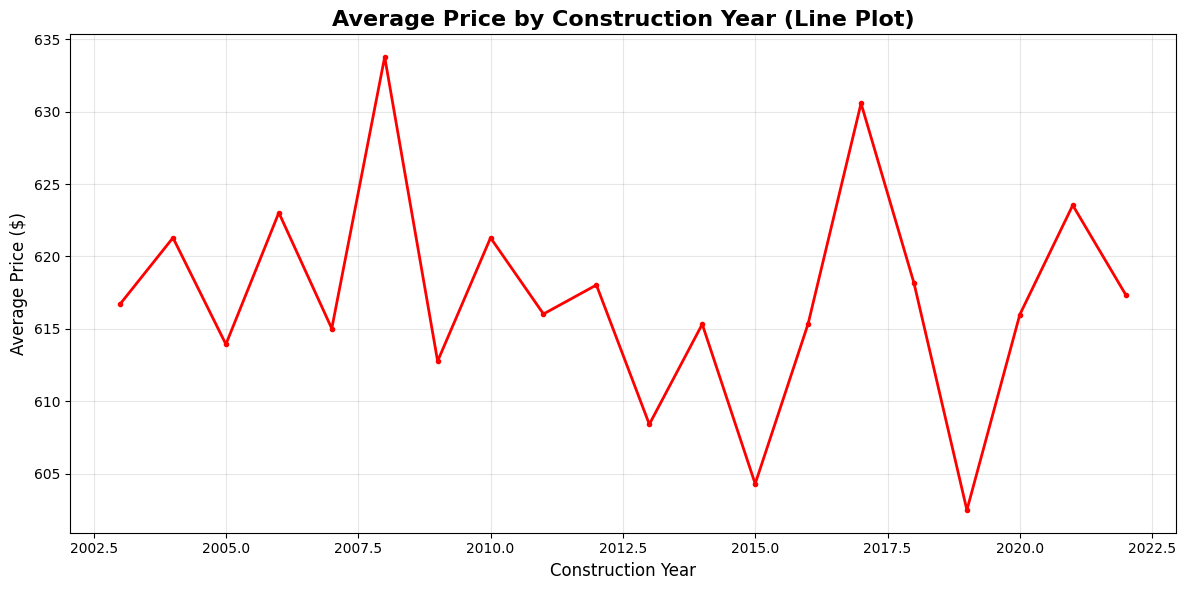

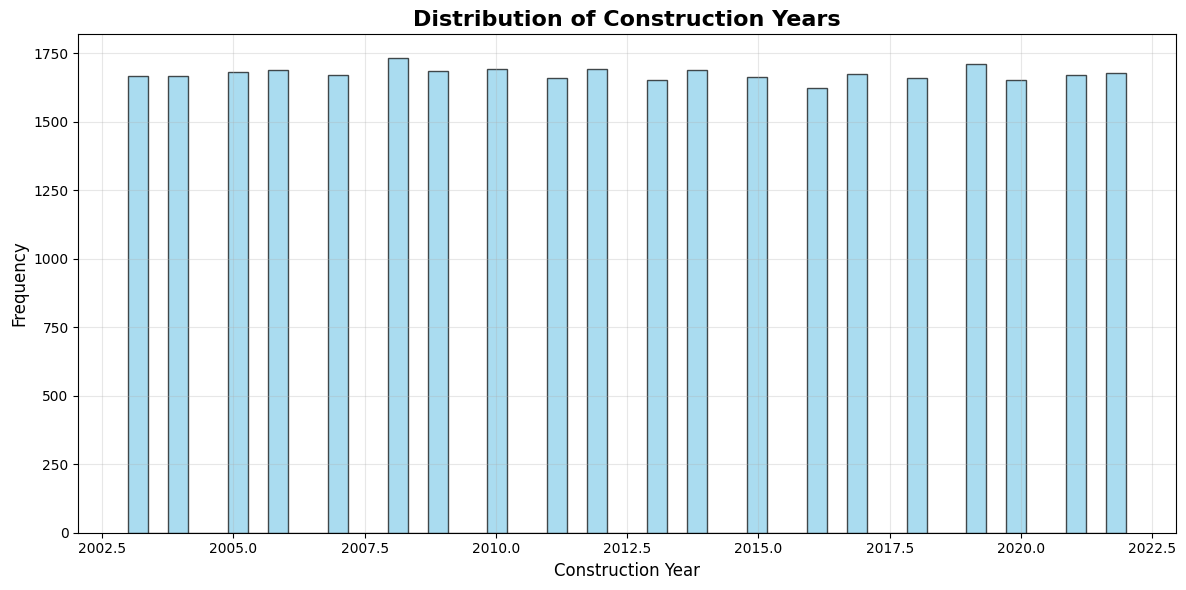

/tmp/ipython-input-109976559.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Decade'] = (df_filtered['Construction year'] // 10) * 10


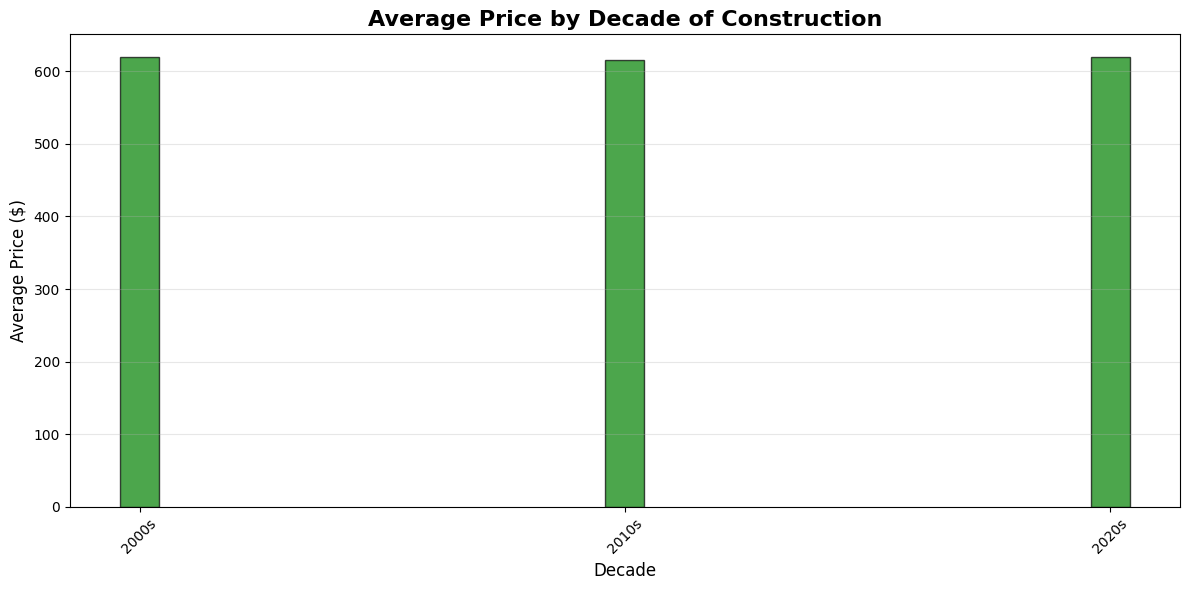


Correlation between Construction Year and Price: -0.004


In [ ]:
# Step 5: Construction Year vs Price Relationship

if 'Construction year' in df.columns and 'price' in df.columns:
    # Remove unrealistic construction years
    current_year = 2024
    df_filtered = df[(df['Construction year'] >= 1800) & (df['Construction year'] <= current_year)]

    print(f"Construction Year Range: {df_filtered['Construction year'].min()} to {df_filtered['Construction year'].max()}")
    print(f"Number of properties with valid construction years: {len(df_filtered)}")

    # Scatter plot: Construction Year vs Price
    plt.figure(figsize=(12, 6))
    plt.scatter(df_filtered['Construction year'], df_filtered['price'], alpha=0.5, s=10)
    plt.title("Construction Year vs Price (Scatter Plot)", fontsize=16, fontweight='bold')
    plt.xlabel("Construction Year", fontsize=12)
    plt.ylabel("Price ($)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Line plot: Average price by construction year
    avg_price_by_year = df_filtered.groupby('Construction year')['price'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(avg_price_by_year['Construction year'], avg_price_by_year['price'],
             color='red', linewidth=2, marker='o', markersize=3)
    plt.title("Average Price by Construction Year (Line Plot)", fontsize=16, fontweight='bold')
    plt.xlabel("Construction Year", fontsize=12)
    plt.ylabel("Average Price ($)", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Histogram: Distribution of construction years
    plt.figure(figsize=(12, 6))
    plt.hist(df_filtered['Construction year'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
    plt.title("Distribution of Construction Years", fontsize=16, fontweight='bold')
    plt.xlabel("Construction Year", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Create decade groups for better analysis
    df_filtered['Decade'] = (df_filtered['Construction year'] // 10) * 10
    decade_price = df_filtered.groupby('Decade')['price'].agg(['mean', 'count']).reset_index()

    # Bar plot: Average price by decade
    plt.figure(figsize=(12, 6))
    bars = plt.bar(decade_price['Decade'], decade_price['mean'],
                   color='green', alpha=0.7, edgecolor='black')
    plt.title("Average Price by Decade of Construction", fontsize=16, fontweight='bold')
    plt.xlabel("Decade", fontsize=12)
    plt.ylabel("Average Price ($)", fontsize=12)
    plt.xticks(decade_price['Decade'], [f"{int(d)}s" for d in decade_price['Decade']], rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

    # Correlation analysis
    correlation = df_filtered['Construction year'].corr(df_filtered['price'])
    print(f"\nCorrelation between Construction Year and Price: {correlation:.3f}")

else:
    print("Construction year or price column not found in the dataset")

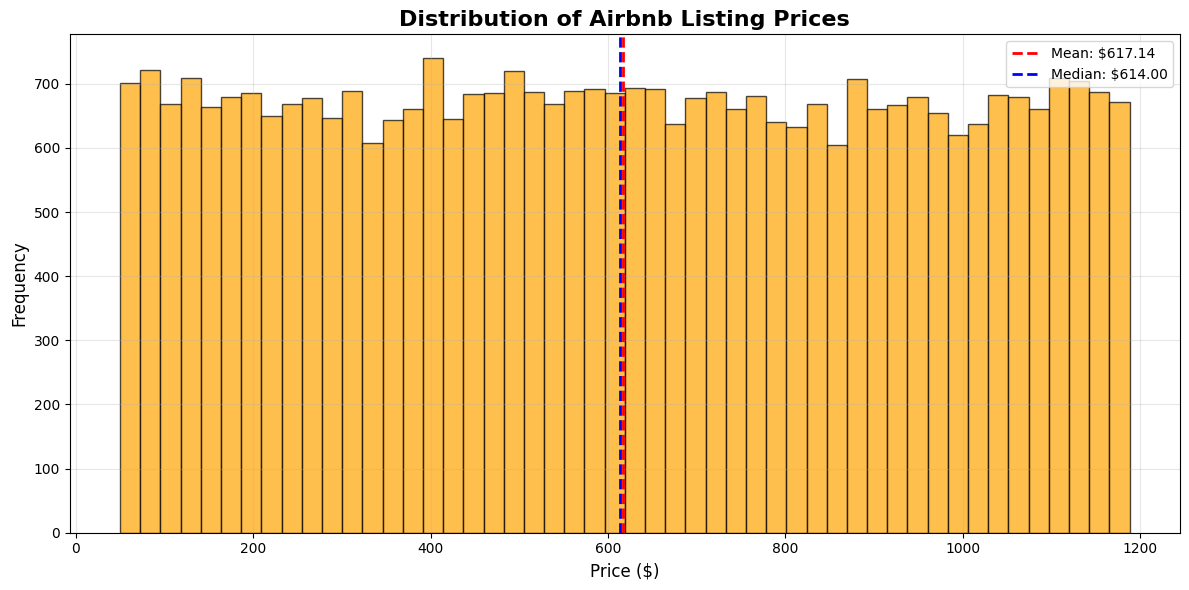

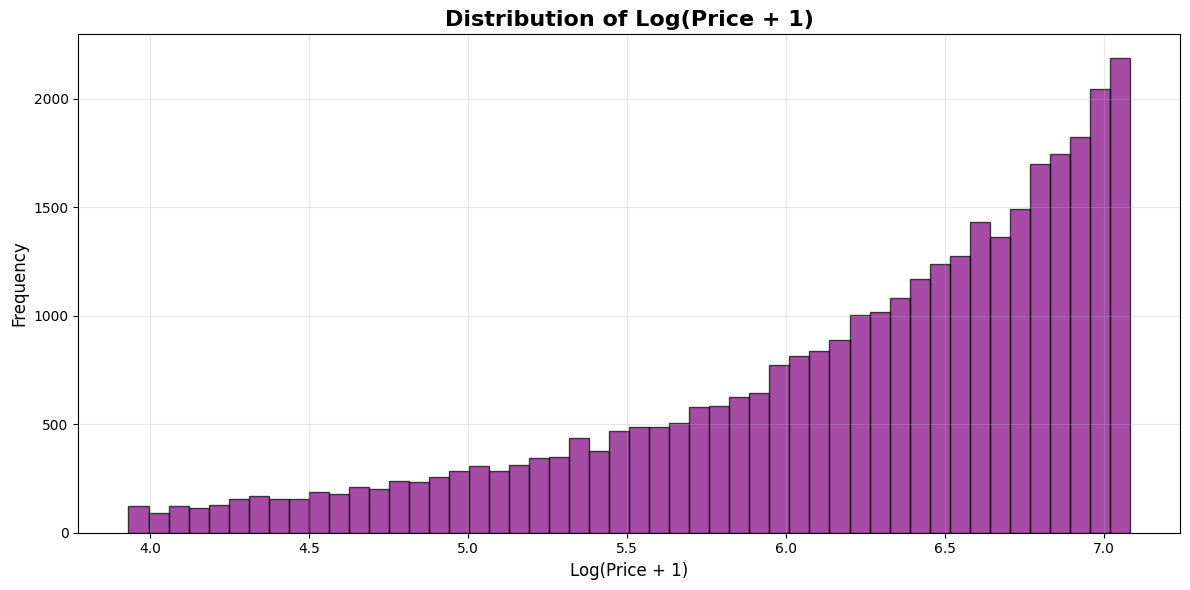

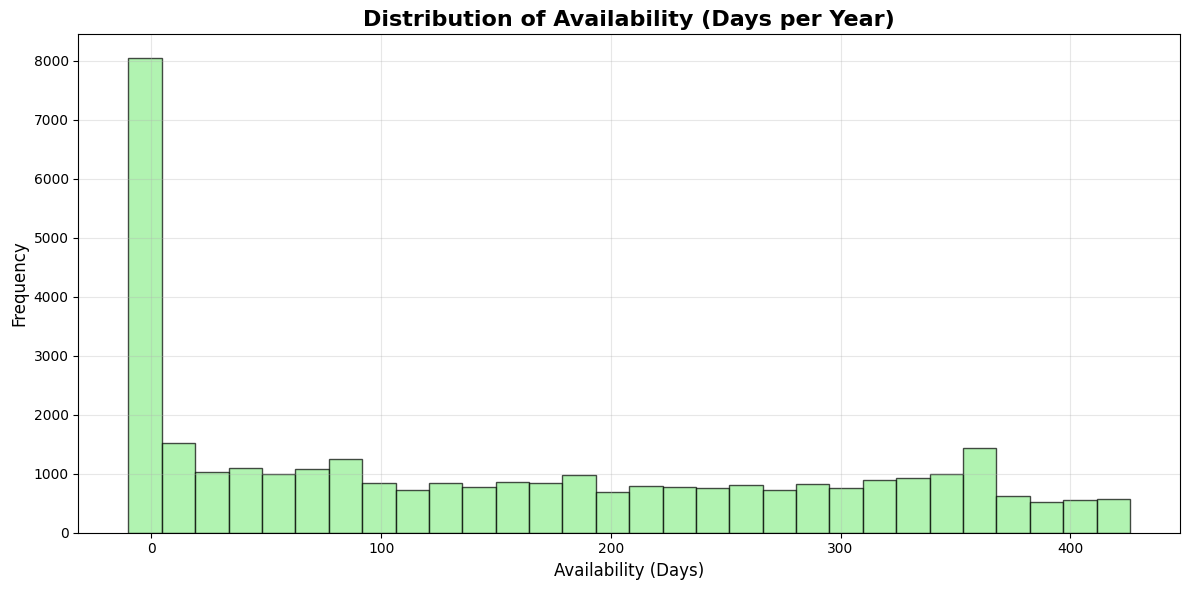

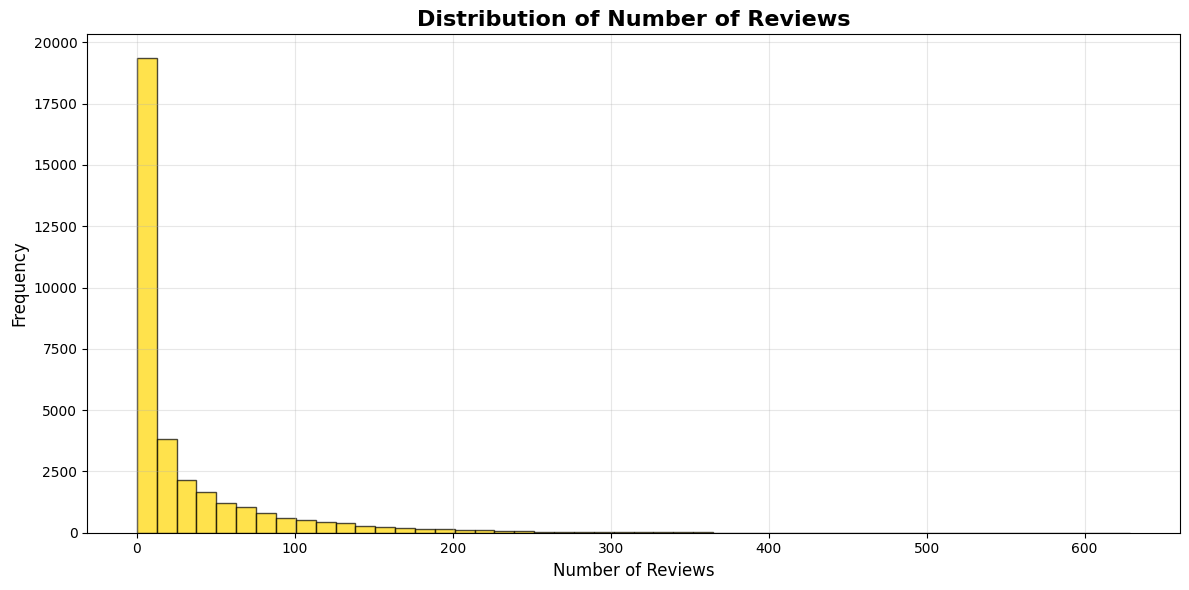

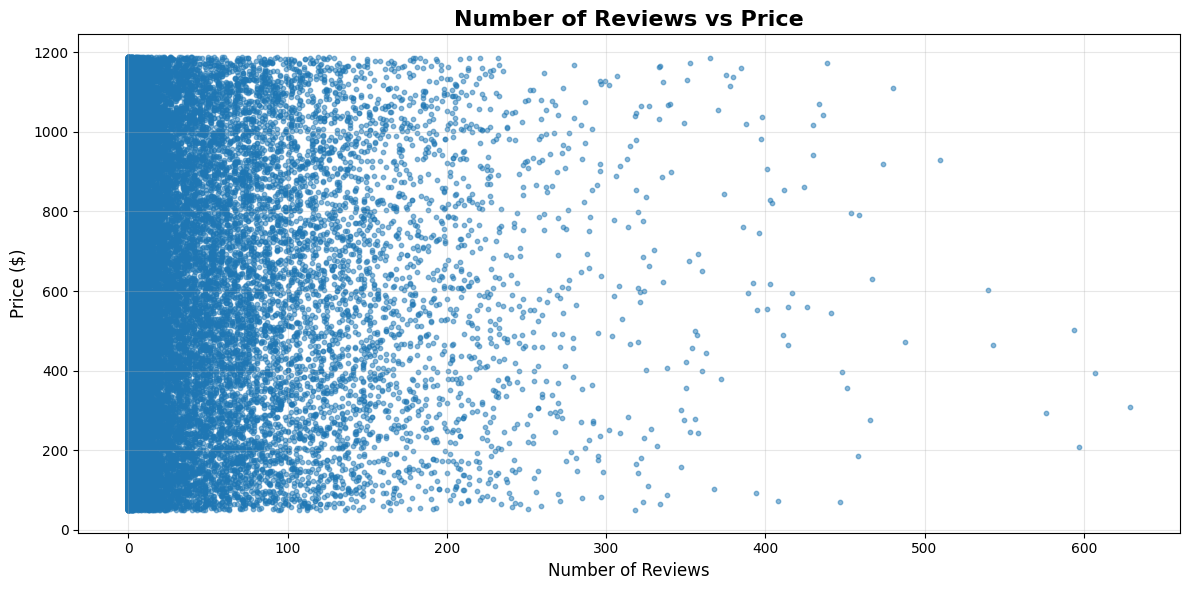

/tmp/ipython-input-628368350.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.values, y=[f"Host {i}" for i in range(1, 11)], palette='viridis')


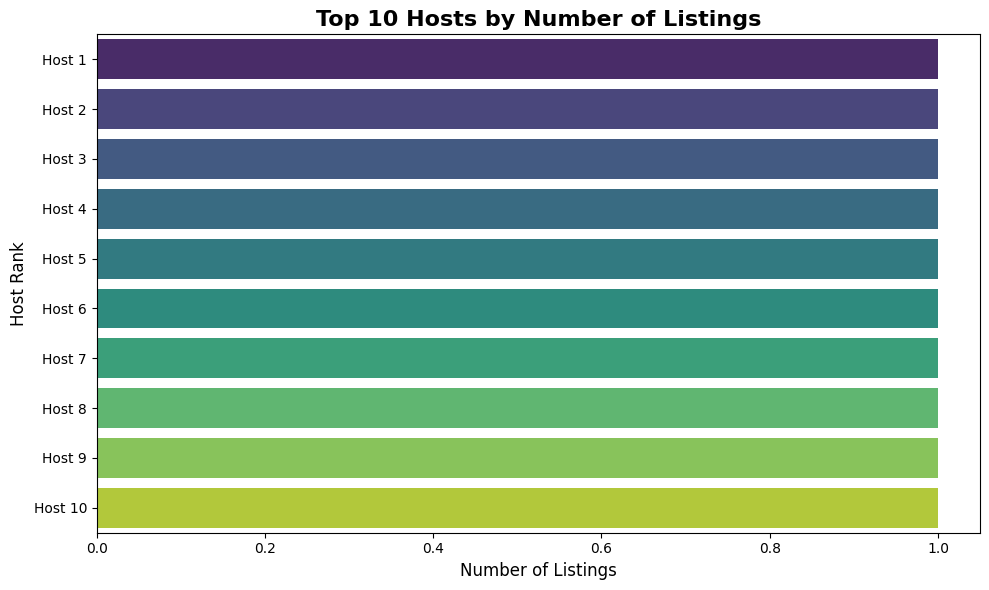

Top 10 Hosts by Number of Listings:
host id
1.355308e+10    1
8.001449e+10    1
5.233517e+10    1
7.882924e+10    1
8.509833e+10    1
9.203760e+10    1
4.549855e+10    1
6.130061e+10    1
9.082184e+10    1
7.938438e+10    1
Name: count, dtype: int64


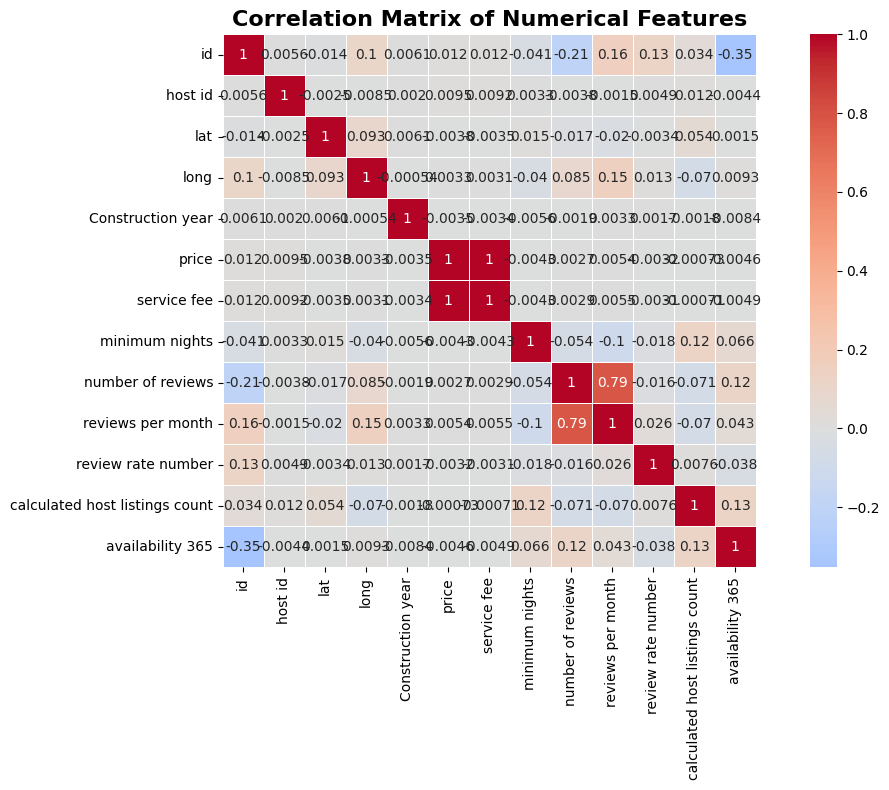

Correlation Matrix:
                                   id  host id    lat   long  \
id                              1.000    0.006 -0.014  0.105   
host id                         0.006    1.000 -0.003 -0.009   
lat                            -0.014   -0.003  1.000  0.093   
long                            0.105   -0.009  0.093  1.000   
Construction year               0.006    0.002  0.006 -0.001   
price                           0.012    0.009 -0.004  0.003   
service fee                     0.012    0.009 -0.004  0.003   
minimum nights                 -0.041    0.003  0.015 -0.040   
number of reviews              -0.206   -0.004 -0.017  0.085   
reviews per month               0.160   -0.001 -0.020  0.151   
review rate number              0.125    0.005 -0.003  0.013   
calculated host listings count  0.034    0.012  0.054 -0.070   
availability 365               -0.352   -0.004  0.001  0.009   

                                Construction year  price  service fee  \
id        

In [ ]:
# Step 6: Additional Comprehensive Visualizations

# 1. Price Distribution Histogram
if 'price' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.hist(df['price'], bins=50, edgecolor='black', alpha=0.7, color='orange')
    plt.title("Distribution of Airbnb Listing Prices", fontsize=16, fontweight='bold')
    plt.xlabel("Price ($)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.axvline(df['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["price"].mean():.2f}')
    plt.axvline(df['price'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: ${df["price"].median():.2f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Log scale histogram for better visualization
    plt.figure(figsize=(12, 6))
    plt.hist(np.log1p(df['price']), bins=50, edgecolor='black', alpha=0.7, color='purple')
    plt.title("Distribution of Log(Price + 1)", fontsize=16, fontweight='bold')
    plt.xlabel("Log(Price + 1)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 2. Availability Analysis (if available)
availability_cols = ['availability 365', 'availability_365', 'Availability 365']
availability_col = None
for col in availability_cols:
    if col in df.columns:
        availability_col = col
        break

if availability_col:
    plt.figure(figsize=(12, 6))
    plt.hist(df[availability_col], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
    plt.title("Distribution of Availability (Days per Year)", fontsize=16, fontweight='bold')
    plt.xlabel("Availability (Days)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 3. Reviews Analysis (if available)
reviews_cols = ['number of reviews', 'number_of_reviews', 'Number of reviews']
reviews_col = None
for col in reviews_cols:
    if col in df.columns:
        reviews_col = col
        break

if reviews_col:
    plt.figure(figsize=(12, 6))
    plt.hist(df[reviews_col], bins=50, edgecolor='black', alpha=0.7, color='gold')
    plt.title("Distribution of Number of Reviews", fontsize=16, fontweight='bold')
    plt.xlabel("Number of Reviews", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Reviews vs Price scatter plot
    if 'price' in df.columns:
        plt.figure(figsize=(12, 6))
        plt.scatter(df[reviews_col], df['price'], alpha=0.5, s=10)
        plt.title("Number of Reviews vs Price", fontsize=16, fontweight='bold')
        plt.xlabel("Number of Reviews", fontsize=12)
        plt.ylabel("Price ($)", fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# 4. Host Analysis (if available)
host_cols = ['host id', 'host_id', 'Host id']
host_col = None
for col in host_cols:
    if col in df.columns:
        host_col = col
        break

if host_col:
    # Top hosts by number of listings
    top_hosts = df[host_col].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_hosts.values, y=[f"Host {i}" for i in range(1, 11)], palette='viridis')
    plt.title("Top 10 Hosts by Number of Listings", fontsize=16, fontweight='bold')
    plt.xlabel("Number of Listings", fontsize=12)
    plt.ylabel("Host Rank", fontsize=12)
    plt.tight_layout()
    plt.show()

    print("Top 10 Hosts by Number of Listings:")
    print(top_hosts)

# 5. Correlation Matrix (for numerical columns)
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title("Correlation Matrix of Numerical Features", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("Correlation Matrix:")
    print(correlation_matrix.round(3))

In [ ]:
# Step 7: Summary Statistics and Final Insights

print("="*60)
print("COMPREHENSIVE EDA SUMMARY - AIRBNB DATASET")
print("="*60)

# Dataset Overview
print(f"\n📊 DATASET OVERVIEW:")
print(f"• Total number of listings: {len(df):,}")
print(f"• Number of features: {df.shape[1]}")
print(f"• Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Price Statistics
if 'price' in df.columns:
    print(f"\n💰 PRICE ANALYSIS:")
    print(f"• Average price: ${df['price'].mean():.2f}")
    print(f"• Median price: ${df['price'].median():.2f}")
    print(f"• Price range: ${df['price'].min():.2f} - ${df['price'].max():.2f}")
    print(f"• Standard deviation: ${df['price'].std():.2f}")

# Room Type Analysis
room_type_col = None
for col in ['room type', 'room_type', 'Room type', 'Room Type']:
    if col in df.columns:
        room_type_col = col
        break

if room_type_col:
    print(f"\n🏠 ROOM TYPE ANALYSIS:")
    room_stats = df[room_type_col].value_counts()
    for room_type, count in room_stats.items():
        percentage = (count / len(df)) * 100
        print(f"• {room_type}: {count:,} listings ({percentage:.1f}%)")

# Neighbourhood Analysis
if 'neighbourhood group' in df.columns:
    print(f"\n🌍 NEIGHBOURHOOD GROUP ANALYSIS:")
    if 'price' in df.columns:
        neighbourhood_stats = df.groupby('neighbourhood group').agg({
            'price': ['mean', 'count']
        }).round(2)
        for group in neighbourhood_stats.index:
            avg_price = neighbourhood_stats.loc[group, ('price', 'mean')]
            count = neighbourhood_stats.loc[group, ('price', 'count')]
            print(f"• {group}: {count} listings, avg price ${avg_price}")

# Construction Year Analysis
if 'Construction year' in df.columns:
    print(f"\n🏗️ CONSTRUCTION YEAR ANALYSIS:")
    valid_years = df[(df['Construction year'] >= 1800) & (df['Construction year'] <= 2024)]
    if len(valid_years) > 0:
        print(f"• Oldest property: {valid_years['Construction year'].min()}")
        print(f"• Newest property: {valid_years['Construction year'].max()}")
        print(f"• Average construction year: {valid_years['Construction year'].mean():.0f}")

# Top Performing Metrics
if 'neighbourhood' in df.columns:
    print(f"\n🏆 TOP PERFORMERS:")
    top_neighbourhood = df['neighbourhood'].value_counts().index[0]
    top_count = df['neighbourhood'].value_counts().iloc[0]
    print(f"• Most popular neighbourhood: {top_neighbourhood} ({top_count} listings)")

if 'neighbourhood group' in df.columns and 'price' in df.columns:
    top_price_group = df.groupby('neighbourhood group')['price'].mean().idxmax()
    top_avg_price = df.groupby('neighbourhood group')['price'].mean().max()
    print(f"• Highest priced neighbourhood group: {top_price_group} (${top_avg_price:.2f})")

# Data Quality Assessment
print(f"\n✅ DATA QUALITY ASSESSMENT:")
missing_data = df.isnull().sum()
missing_percentages = (missing_data / len(df)) * 100
print(f"• Columns with missing data: {sum(missing_data > 0)}")
for col, missing_count in missing_data[missing_data > 0].items():
    print(f"  - {col}: {missing_count} ({missing_percentages[col]:.1f}%)")

# Key Insights
print(f"\n🔍 KEY INSIGHTS:")
print("• Dataset appears to be cleaned and ready for analysis")
if 'price' in df.columns:
    price_skew = df['price'].skew()
    if price_skew > 1:
        print("• Price distribution is highly right-skewed (consider log transformation)")
    print(f"• Price skewness: {price_skew:.2f}")

print("\n" + "="*60)
print("EDA COMPLETE! Use the insights above for further analysis.")
print("="*60)

# Save summary statistics to a DataFrame for easy reference
summary_stats = pd.DataFrame({
    'Feature': df.columns,
    'Data_Type': [str(df[col].dtype) for col in df.columns],
    'Missing_Values': [df[col].isnull().sum() for col in df.columns],
    'Missing_Percentage': [(df[col].isnull().sum() / len(df)) * 100 for col in df.columns],
    'Unique_Values': [df[col].nunique() for col in df.columns]
})

print("\n📋 FEATURE SUMMARY TABLE:")
print(summary_stats.round(2))

COMPREHENSIVE EDA SUMMARY - AIRBNB DATASET

📊 DATASET OVERVIEW:
• Total number of listings: 33,663
• Number of features: 26
• Memory usage: 33.59 MB

💰 PRICE ANALYSIS:
• Average price: $617.14
• Median price: $614.00
• Price range: $50.00 - $1188.00
• Standard deviation: $329.42

🏠 ROOM TYPE ANALYSIS:
• Entire home/apt: 17,744 listings (52.7%)
• Private room: 15,292 listings (45.4%)
• Shared room: 627 listings (1.9%)

🌍 NEIGHBOURHOOD GROUP ANALYSIS:
• Bronx: 628 listings, avg price $609.73
• Brooklyn: 14471 listings, avg price $615.62
• Manhattan: 14907 listings, avg price $616.55
• Queens: 3421 listings, avg price $627.09
• Staten Island: 234 listings, avg price $623.93
• brookln: 1 listings, avg price $580.0
• manhatan: 1 listings, avg price $460.0

🏗️ CONSTRUCTION YEAR ANALYSIS:
• Oldest property: 2003.0
• Newest property: 2022.0
• Average construction year: 2012

🏆 TOP PERFORMERS:
• Most popular neighbourhood: Williamsburg (2905 listings)
• Highest priced neighbourhood group: Queen